In [59]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [70]:
wav_loc = "data/research.wav"
rate, data = wavfile.read(wav_loc)
data = data / 32768

In [71]:
def fftnoise(f):
    f = np.array(f, dtype="complex")
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1 : Np + 1] *= phases
    f[-1 : -1 - Np : -1] = np.conj(f[1 : Np + 1])
    return np.fft.ifft(f).real


def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1 / samplerate))
    f = np.zeros(samples)
    f[np.logical_and(freqs >= min_freq, freqs <= max_freq)] = 1
    return fftnoise(f)

In [72]:
IPython.display.Audio(data=data, rate=rate)

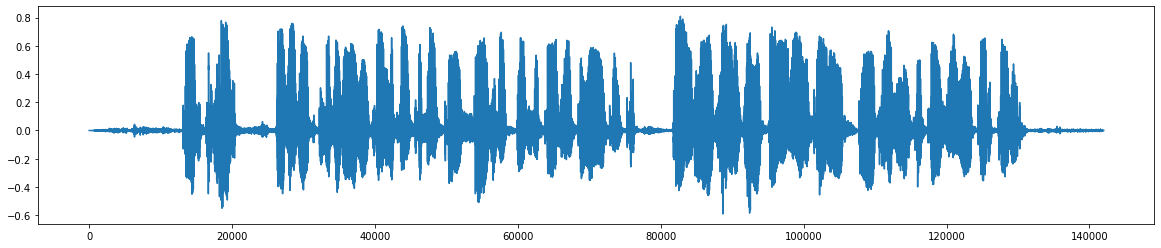

In [73]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(data)

In [74]:

audio_clip_band_limited = data

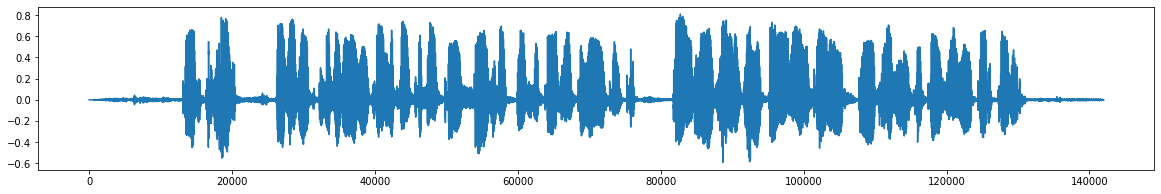

In [75]:

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [76]:

IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

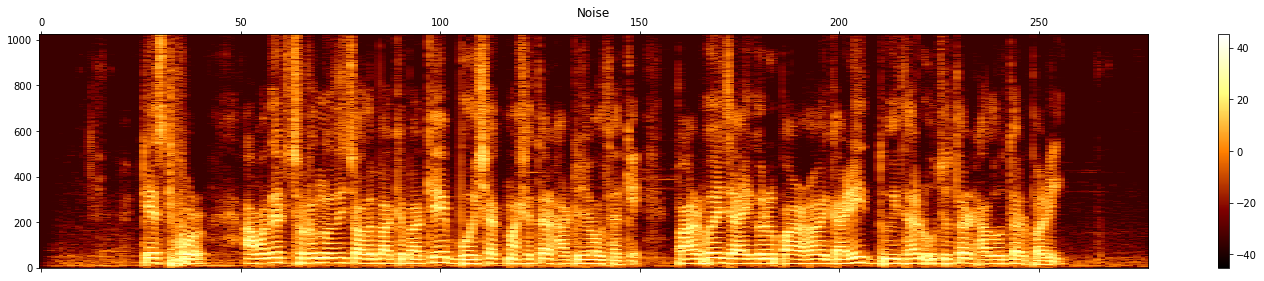

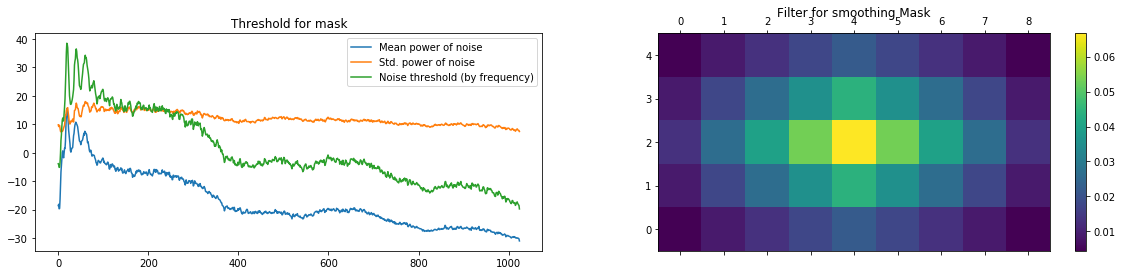

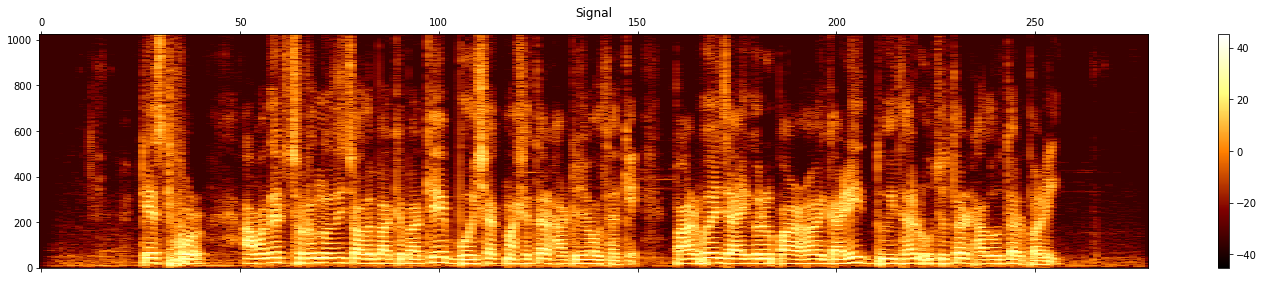

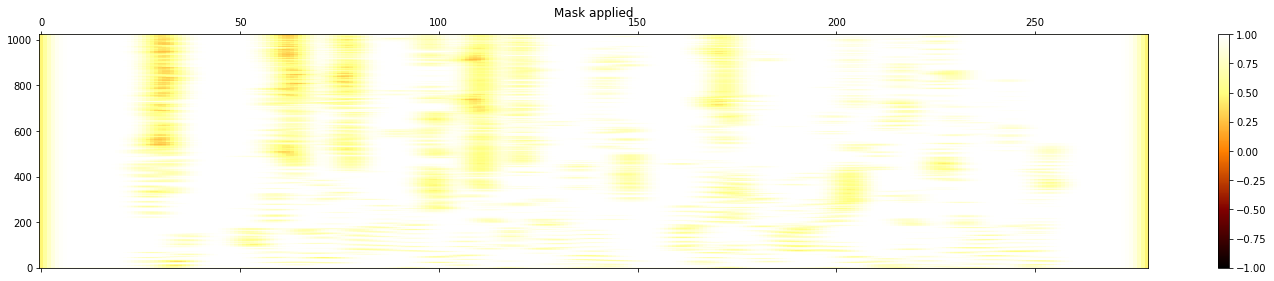

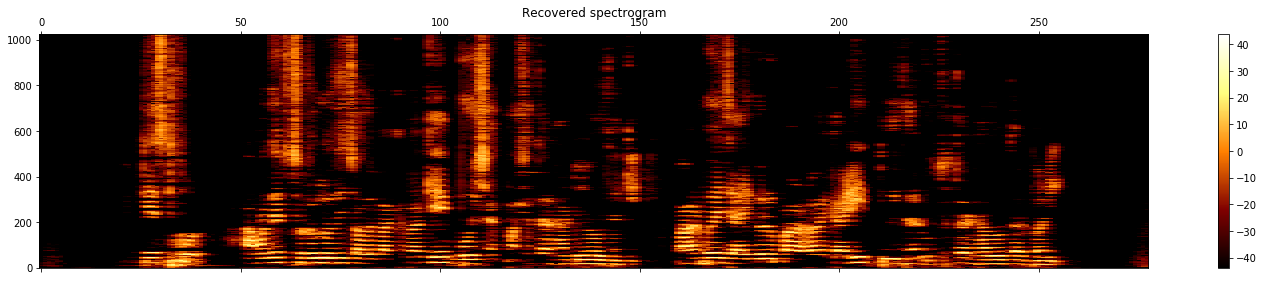

In [77]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=data, prop_decrease=1.0, verbose=True)

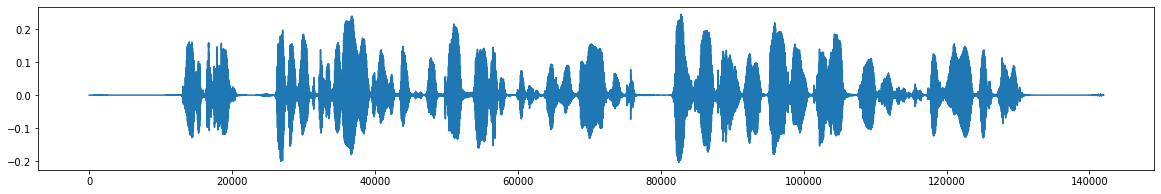

In [78]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [79]:

IPython.display.Audio(data=noise_reduced, rate=rate)